<a href="https://colab.research.google.com/github/Arush0113/ArushTensorflowRepo/blob/main/Customising%20your%20models%20with%20Tensorflow%202/Coding_Tutorials_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [66]:
from tensorflow.keras.datasets import cifar100

In [67]:
# Load the CIFAR-100 dataset

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 11s 0us/step


In [72]:
# Confirm that reloading the dataset does not require a download

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

#### Import the data

The additional files required for this tutorial can be downloaded from the following link:

cifar100_fine_labels: https://drive.google.com/open?id=1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5

cifar100_coarse_labels: https://drive.google.com/open?id=1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p

You should store these files in Drive for use in this Colab notebook.

In [73]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
# Examine the shape of the data.

print(train_images.shape)
print(train_labels.shape)


(50000, 32, 32, 3)
(50000, 1)


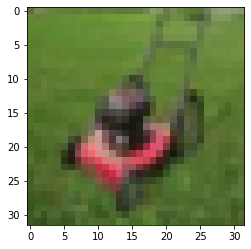

In [75]:
# Examine one of the images and its corresponding label

plt.imshow(train_images[500])

In [76]:
# Load the list of labels from a JSON file

import json

with open('/content/gdrive/MyDrive/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [77]:
# Print a few of the labels

cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [78]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[41])

lawn_mower


#### Load the data using different label modes

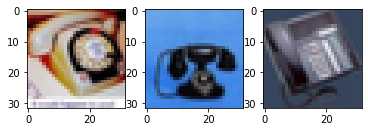

In [79]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [80]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='coarse')

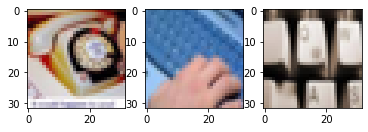

In [81]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [82]:
# Load the list of coarse labels from a JSON file

with open('/content/gdrive/MyDrive/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [83]:
# Print a few of the labels

cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [84]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


#### Load the IMDB Dataset

In [85]:
from tensorflow.keras.datasets import imdb

In [86]:
# Load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [87]:
# Print an example from the training dataset, along with its corresponding label

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [88]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [89]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [90]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [91]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [92]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [93]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [94]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data)

In [95]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [96]:
# Determine the maximum and minimum sequence length

print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV

You should store this file in Drive for use in this Colab notebook.

In [201]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [202]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('/content/gdrive/MyDrive/fertility_Diagnosis.txt', delimiter=',', header=None, names=headers)
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [203]:
# Print the shape of the DataFrame

print(fertility.shape)

(100, 10)


In [204]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [205]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [206]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [207]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [208]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [209]:
# Show the head of the DataFrame

fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,1.00,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0
1,-0.33,0.53,1.0,1.0,0.0,1.0,1.0,-1.0,0.75,0.0
2,-0.33,0.50,1.0,0.0,1.0,-1.0,0.8,-1.0,0.50,0.0
3,1.00,0.67,0.0,0.0,1.0,0.0,0.6,0.0,0.50,1.0
4,-0.33,0.67,1.0,0.0,1.0,0.0,0.8,-1.0,0.19,0.0


In [210]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [211]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0,0,0,0,1
1,0.53,1.0,1.0,0.0,1.0,1.0,-1.0,0.75,0.0,0,1,0,0
2,0.50,1.0,0.0,1.0,-1.0,0.8,-1.0,0.50,0.0,0,1,0,0
3,0.67,0.0,0.0,1.0,0.0,0.6,0.0,0.50,1.0,0,0,0,1
4,0.67,1.0,0.0,1.0,0.0,0.8,-1.0,0.19,0.0,0,1,0,0


In [212]:
# Move the Output column such that it is the last column in the DataFrame

fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [213]:
# Show the head of the DataFrame

fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.67,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,0.0,0,0,0,1
1,0.53,1.0,1.0,0.0,1.0,1.0,-1.0,0.75,0.0,0,1,0,0
2,0.50,1.0,0.0,1.0,-1.0,0.8,-1.0,0.50,0.0,0,1,0,0
3,0.67,0.0,0.0,1.0,0.0,0.6,0.0,0.50,1.0,0,0,0,1
4,0.67,1.0,0.0,1.0,0.0,0.8,-1.0,0.19,0.0,0,1,0,0


In [214]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [215]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [216]:
# Verify the shape of the training data

print(training.shape)
print(validation.shape)

(70, 13)
(30, 13)


In [217]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [218]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [219]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [220]:
# Test the generator using the next() function

next(train_generator)

(array([[ 0.67,  0.  ,  0.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  1.  , -1.  ,  0.75,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.5 ,  1.  ,  0.  ,  1.  , -1.  ,  0.8 , -1.  ,  0.5 ,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.67,  0.  ,  0.  ,  1.  ,  0.  ,  0.6 ,  0.  ,  0.5 ,  1.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 , -1.  ,  0.19,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.81,  1.  ,  1.  ,  1.  ,  1.  ,  0.8 , -1.  ,  0.38,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.67,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 , -1.  ,  0.5 ,  1.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.56,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.63,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.72,  1.  ,  1.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.19,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  0.8 , -1.  ,  0.38,  0.  ,
 

#### Build the model

In [221]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [222]:
# Display the model summary to show the resultant structure

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12)                48        
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1300      
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [223]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [224]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [225]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [226]:
# Set the epochs to 3

epochs = 3

In [227]:
# Train the model

for epoch in range(epochs):
  train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
  validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
  model.fit_generator(train_generator, steps_per_epoch=train_steps, validation_data=validation_generator, validation_steps=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


14/14 [==============================] - 0s 9ms/step - loss: 0.0369 - accuracy: 0.9857 - val_loss: 0.1441 - val_accuracy: 0.9667


In [228]:
# Try to run the fit_generator function once more; observe what happens

model.fit_generator(train_generator, steps_per_epoch=train_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


StopIteration: ignored

#### Make an infinitely looping generator

In [229]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
      for n in range(int(len(features)/batch_size)):
          yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
      permuted = np.random.permutation(len(features))
      features = features[permuted]
      labels = labels[permuted]

In [230]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [232]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [233]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [234]:
# Train the model

model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps, validation_data=validation_generator_cyclic, validation_steps=1, epochs = 3)

Epoch 1/3
 1/14 [=>............................] - ETA: 0s - loss: 0.1985 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


14/14 [==============================] - 0s 12ms/step - loss: 0.0436 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 7ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 0.1301 - val_accuracy: 1.0000
Epoch 3/3
14/14 [==============================] - 0s 6ms/step - loss: 0.0443 - accuracy: 0.9857 - val_loss: 4.6009e-04 - val_accuracy: 1.0000


#### Evaluate the model and get predictions

In [235]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [236]:
# Get predictions on the validation data

predictions = model.predict(validation_generator, steps = 1)
print(np.round(predictions.T[0]))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0.]


In [237]:
# Print the corresponding validation labels

print(validation_labels)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0.]


In [238]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [239]:
# Evaluate the model

model.evaluate(validation_generator)

1/1 [==============================] - 0s 40ms/step - loss: 0.0047 - accuracy: 1.0000


[0.004708291031420231, 1.0]

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files in Drive for use in this Colab notebook.

In [240]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [241]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [242]:
from tensorflow.keras.datasets import cifar10

In [243]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

In [244]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [245]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [246]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [247]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


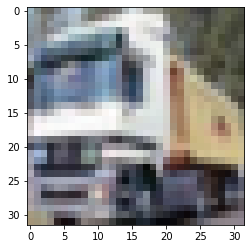

In [248]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [249]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [250]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [251]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [252]:
# def monochrome1(x):
#   def func_for_blacknwhite(a):
#     average_color = np.mean(a)
#     return [average_color, average_color, average_color]
#   x = np.apply_along_axis(func_for_blacknwhite, -1, x)
#   return x

In [253]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(
    preprocessing_function = monochrome,
    rotation_range = 180,
    rescale = (1/255.0),
    horizontal_flip = False,
    vertical_flip = False
)

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [254]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features, training_labels, batch_size=1, shuffle = False)

In [256]:
list = np.arange(1,10)
iter_obj1 = iter(list)
# print(list)
# iter(list)
for i in iter(list):
  print(i,'!!')

print(next(iter_obj1))
print(next(iter_obj1))
print(next(iter_obj1))

1 !!
2 !!
3 !!
4 !!
5 !!
6 !!
7 !!
8 !!
9 !!
1
2
3


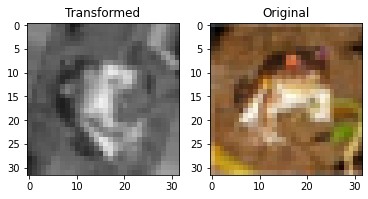

In [257]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [258]:
# Inspect the directory structure

train_path = '/content/gdrive/MyDrive/flowers-recognition-split/train'
val_path = '/content/gdrive/MyDrive/flowers-recognition-split/val'

In [183]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [184]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [185]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(train_path, batch_size = 64, classes = classes, target_size = (16,16))

Found 0 images belonging to 5 classes.


In [186]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(val_path, batch_size=64, classes = classes, target_size = (16,16))

Found 0 images belonging to 5 classes.


In [ ]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

In [187]:
# Reset the training generator

training_generator = datagenerator.flow_from_directory(val_path, batch_size = 64, classes = classes, target_size = (16,16))

Found 0 images belonging to 5 classes.


#### Create a model to train

In [188]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [189]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [190]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [191]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 8)         1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 8)           4104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 4)           516       
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2

#### Train the model

In [192]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

0 0


In [193]:
# Fit the model
model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, epochs = 5)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

#### Evaluate the model

In [259]:
# Evaluate the model

model.evaluate_generator(val_generator, steps=val_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


ValueError: ignored

#### Predict using the generator

In [261]:
# Predict labels with the model

predictions = model.predict_generator(val_generator, steps = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


ValueError: ignored

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1BAjGPFlpqsDdWof50Ng3Fmju5O8F1_uZ

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [ ]:
x = np.zeros((100,10,2,2))

In [ ]:
# Create a dataset from the tensor x



In [ ]:
# Inspect the Dataset object



In [ ]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [ ]:
# Try creating a dataset from the tensor x2



In [ ]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [ ]:
# Create another dataset from the new x2 and inspect the Dataset object



In [ ]:
# Print the element_spec

print(dataset2.element_spec)

#### Create a zipped dataset

In [ ]:
# Combine the two datasets into one larger dataset



In [ ]:
# Print the element_spec

print(dataset_zipped.element_spec)

In [ ]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [ ]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

#### Create a dataset from numpy arrays

In [ ]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

In [ ]:
# Create a Dataset from the MNIST data



In [ ]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

In [ ]:
# Inspect the length of an element using the take method



In [ ]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

#### Create a dataset from text data

In [ ]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('path/to/shakespeare')])

print(text_files)

In [ ]:
# Load the first file using python and print the first 5 lines.

with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

In [ ]:
# Load the lines from the files into a dataset using TextLineDataset



In [ ]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

In [ ]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

In [ ]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

#### Interleave lines from the text data files

In [ ]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

In [ ]:
# Interleave the lines from the text files



In [ ]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('path/to/bank/bank-full.csv', delimiter=';')

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

In [ ]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

In [ ]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

#### Preprocess the data

In [ ]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

In [ ]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

In [ ]:
# Convert the DataFrame to a Dataset



In [ ]:
# Inspect the Dataset object



#### Filter the Dataset

In [ ]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

In [ ]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [ ]:
# Check the records in the dataset again

check_divorced()

#### Map a function over the dataset

In [ ]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'



In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

In [ ]:
# Remove the 'marital' column



In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

#### Create input and output data tuples

In [ ]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [ ]:
# Map this function over the dataset



In [ ]:
# Inspect the Dataset object



#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

In [ ]:
# Make training and validation sets from the dataset



#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Show the model summary

model.summary()

#### Train the model

In [ ]:
# Create batched training and validation datasets



In [ ]:
# Shuffle the training data



In [ ]:
# Fit the model



In [ ]:
# Plot the training and validation accuracy

